# Credit card fraud detection using classification algorithms 

Given the dataset, the objective of the model is to identify whether the transaction is fraud or not fraud.

###### To achieve this three classification models are developed using different algorithms.
They are:
    1. Logistic Regression
    2. Support Vector Classifier
    3. Decision Tree

Importing the libraries required:

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

##### Import the dataset using read_csv function os pandas

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##### About the datatset : 

The dataset contains of 31 columns representing features.
Time representing the number of seconds elapsed between this transaction and the first transaction in the dataset.
v1 - v28 representing the result of a PCA Dimensionality reduction to protect user identities and sensitive features.
Amount and class saying whether the transaction is fraud  or not.

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.iloc[:,-1:].value_counts(normalize=True)

Class
0        0.998273
1        0.001727
dtype: float64

<AxesSubplot:xlabel='Class'>

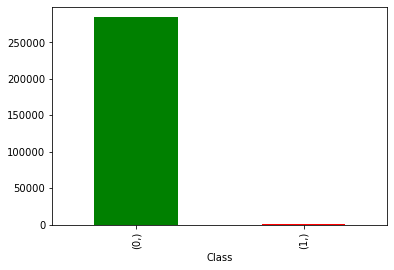

In [9]:
df.iloc[:, -1:].value_counts().plot.bar(color=[ 'green', 'red'])

##### It shows that the data is unbalanced

In [10]:
X_raw = df.iloc[:,:-1]
y = df.iloc[:,-1:]

# 1.Logistic Regression

Now scaling the features using MinMaxScaler to process develop a model

In [27]:
scaler = MinMaxScaler()
X_array = scaler.fit_transform(X_raw)
X = pd.DataFrame(X_array)

In [28]:
X.head(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724


In [29]:
print(f"The range of feature inputs : {X.min()} to {X.max()}")

The range of feature inputs : 0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
dtype: float64 to 0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64


Split the dataset into training and test data using train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 11)

In [31]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (227845, 30), y_train: (227845, 1)


In [32]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (56962, 30), y_test: (56962, 1)


###### Initialising the logistic regression model with penalty as l2

In [33]:
lgrl2 = LogisticRegression(random_state = 20, penalty = 'l2', max_iter =1000)

fitting the model

In [34]:
lgrl2.fit(X_train, y_train)

C:\Users\sundh\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=20)

In [35]:
pred_l2 = lgrl2.predict(X_test)

In [36]:
def evaluate_metrics(yt,y_pr):
    return pd.Series({'accuracy':accuracy_score(yt, y_pr),
                      'precision':precision_score(yt, y_pr),
                      'recall':recall_score(yt,y_pr),
                      'f1_score':f1_score(yt, y_pr)},
                      ).to_frame()

In [37]:
evaluate_metrics(y_test, pred_l2)

,0
accuracy,0.999052
precision,0.854839
recall,0.540816
f1_score,0.662500


The metrics to calculate the model performance are found and recorded. 

###### Initialising the logistic regression model with penalty as l1

In [38]:
lgr_l1 = LogisticRegression(random_state = 20, penalty = 'l1', max_iter =1000, solver='saga')

In [39]:
lgr_l1.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000, penalty='l1', random_state=20, solver='saga')

In [40]:
pred_l1 = lgr_l1.predict(X_test)

In [41]:
evaluate_metrics(y_test, pred_l1)

,0
accuracy,0.999192
precision,0.871429
recall,0.622449
f1_score,0.726190


Now from the metrics calculated it is found that the logistic regression model with l1 penalty works better than model with penalty l2 as the f1 score looks better.

###### Deriving the confusion matrix for logistic regression with penalty l1

In [42]:
cf = confusion_matrix(y_test, pred_l1)

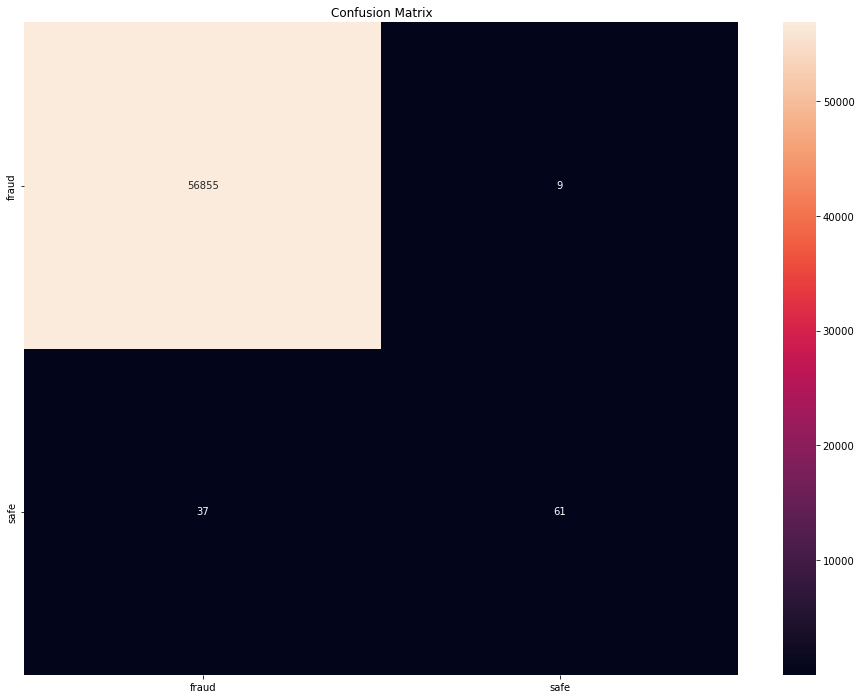

In [43]:
plt.figure(figsize=(16, 12))
ax = sns.heatmap(cf, annot=True, fmt="d", xticklabels=["fraud", "safe"], 
                 yticklabels=["fraud", "safe"])
ax.set(title="Confusion Matrix");

# 2.Support Vector Classifier

In [44]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Selecting equal number of classes for fraud and safe transaction data.

In [45]:
fraud=df.loc[df['Class']==1]
no_fraud=df.loc[df['Class']==0][:492]

In [46]:
data=pd.concat([fraud,no_fraud])

In [47]:
new_data = data.sample(frac=1, random_state=42)

In [48]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
121,77.0,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,-0.291864,...,-0.201681,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,9.12,0
248296,153875.0,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00,1
239,160.0,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,-0.471302,...,0.070051,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,20.00,0
239501,150139.0,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,...,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,237.26,1
143336,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1


In [49]:
new_data['Class'].value_counts()[0], new_data['Class'].value_counts()[1]

(492, 492)

In [50]:
df1=new_data.copy()

Scaling the data with standard scaler

In [51]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1['scaled_amount']=ss.fit_transform(df1['Amount'].values.reshape(-1,1))
df1['scaled_time']=ss.fit_transform(df1['Time'].values.reshape(-1,1))

df1.drop(['Time','Amount'],axis=1,inplace=True)

In [52]:
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
121,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,-0.291864,0.064800,...,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,0,-0.362905,-0.768019
248296,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,...,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1,-0.400902,2.156941
239,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,-0.471302,0.029104,...,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,0,-0.317576,-0.766441
239501,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,...,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1,0.587598,2.085889
143336,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,...,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1,0.652842,0.852483


In [53]:
scaled_amount = df1['scaled_amount']
scaled_time = df1['scaled_time']

df1.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df1.insert(0, 'scaled_amount', scaled_amount)
df1.insert(1, 'scaled_time', scaled_time)

In [54]:
df1.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
121,-0.362905,-0.768019,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,...,0.052828,-0.201681,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,0
248296,-0.400902,2.156941,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,...,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1
239,-0.317576,-0.766441,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,...,-0.119439,0.070051,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,0
239501,0.587598,2.085889,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,...,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1
143336,0.652842,0.852483,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,...,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1


In [55]:
x = df1.drop('Class', axis=1)
y = df1['Class']

In [56]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
from sklearn.svm import SVC

In [58]:
from sklearn.model_selection import ParameterGrid, GridSearchCV

In [59]:
c_values = [0.1, 1, 10, 100]
gamma_values = [0.1, 0.01, 0.001, 0.0001]
kernels = ['rbf', 'sigmoid']
param_grid = {'C': c_values, 'gamma': gamma_values, 'kernel': kernels}

In [60]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [61]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.861 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.854 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.834 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.866 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.873 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.848 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.936 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.917 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.898 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.924 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.949 total time=   0.0s
[CV 2/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.905 total time=   0.0s
[CV 3/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.930 total time=   0.0s
[CV 4/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.917 total time=   0.0s
[CV 5/5] END C=10, gamma=0.0001, kernel=sigmoid;, score=0.943 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.924 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.0s
[CV 1/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.848 total time=   0.0s
[CV 2/5] END ..C=100, gamma=0.1, kernel=sigmoid;, score=0.804 total time=   0.0s
[CV 3/5] END ..C=100, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [62]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [63]:
svc_best=SVC(C= 10, gamma= 0.01, kernel= 'rbf')

In [64]:
model=svc_best.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [65]:
evaluate_metrics(y_test, y_pred)

,0
accuracy,0.994924
precision,1.000000
recall,0.990909
f1_score,0.995434


C:\Users\sundh\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


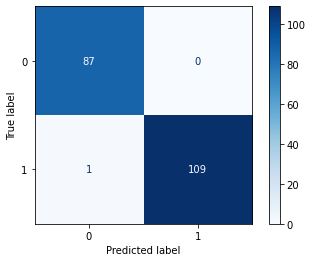

In [66]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test,cmap='Blues')  
plt.show()

# 3.Decision Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model = DecisionTreeClassifier(random_state=10)

In [69]:
X=df.iloc[:,:-1]
y=df['Class']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 10)

In [71]:
model.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(random_state=10)

In [72]:
preds = model.predict(X_test)

In [73]:
evaluate_metrics(y_test, preds)

,0
accuracy,0.999105
precision,0.737374
recall,0.744898
f1_score,0.741117


###### Drawing the decision tree:

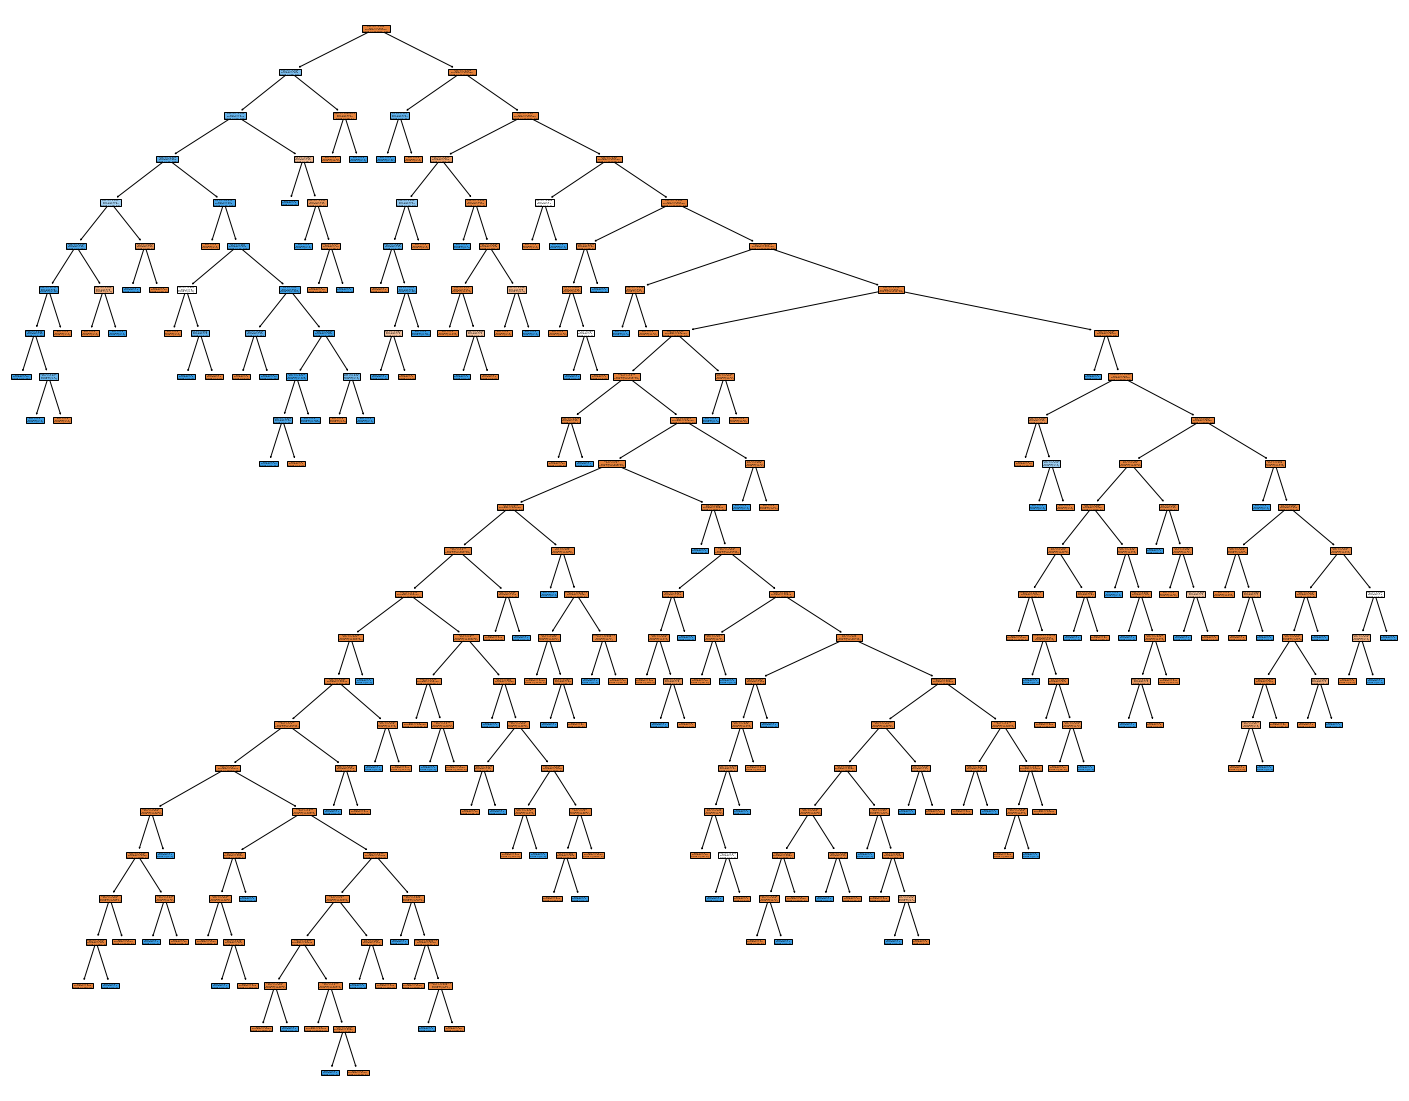

In [74]:
from sklearn import tree
plt.subplots(figsize=(25, 20)) 
tree.plot_tree(model, feature_names=X.columns,  filled=True)
plt.show()

Now lets see the f1 score of three developed models:

    1.Logistic Regression:
        f1 score = 0.7261
    
    2.Support Vector Classifier:
        f1 score = 0.9954
    
    3.Decision Tree:
        f1 score = 0.7411

Thank You